In [7]:
import numpy as np
import os
import dv_processing as dv
from datetime import timedelta
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import cv2


import sys
sys.path.append('../')
from src.data.preprocessing import *
from src.data.custom_dataset import *
from src.models.convlstm import ConvLSTM

from src.utils.plotting import *


In [8]:
train_dataloader, test_dataloader = create_dataloader(
    data_dir='../data/seq_data',
    batch_size=64,
    num_workers=47,
)

Total number of sequences: 555
Number of training sequences: 444
Number of test sequences: 111


/home/khoahd/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Training set - Press: 32613, No Press: 100587
Test set - Press: 8574, No Press: 24726
Training DataLoader:
torch.Size([64, 300, 1, 32, 32]) torch.Size([64, 300])
Test DataLoader:
torch.Size([64, 300, 1, 32, 32]) torch.Size([64, 300])
Number of training batches: 7
Number of test batches: 2


## 1. ConvLSTM

In [9]:
checkpoint_path = '../saved_models/epoch=79-step=320.ckpt'
model = ConvLSTM.load_from_checkpoint(checkpoint_path, in_channels=1, feature_size=64)

[(83, 300), (85, 300), (15, 297), (49, 296), (73, 284), (47, 276), (16, 241), (92, 183), (100, 166), (36, 165), (24, 164), (84, 156), (38, 151), (40, 144), (42, 142), (25, 140), (13, 135), (70, 132), (46, 130), (22, 128), (48, 128), (75, 127), (11, 126), (71, 122), (18, 120), (77, 119), (1, 109), (104, 108), (21, 107), (89, 105), (45, 104), (39, 94), (32, 89), (68, 85), (109, 81), (102, 75), (12, 72), (28, 72), (59, 72), (5, 71), (53, 71), (0, 69), (74, 68), (96, 67), (78, 64), (41, 61), (34, 55), (20, 51), (69, 48), (30, 44), (97, 43), (4, 35), (19, 34), (29, 33), (64, 26), (103, 25), (60, 22), (93, 21), (90, 20), (108, 20), (3, 19), (31, 19), (72, 19), (23, 18), (37, 17), (82, 17), (107, 17), (33, 16), (55, 14), (43, 13), (62, 13), (86, 12), (95, 11), (6, 8), (80, 7), (2, 6), (10, 6), (105, 5), (50, 4), (8, 1), (44, 1), (7, 0), (9, 0), (14, 0), (17, 0), (26, 0), (27, 0), (35, 0), (51, 0), (52, 0), (54, 0), (56, 0), (57, 0), (58, 0), (61, 0), (63, 0), (65, 0), (66, 0), (67, 0), (76, 0

KeyboardInterrupt: 

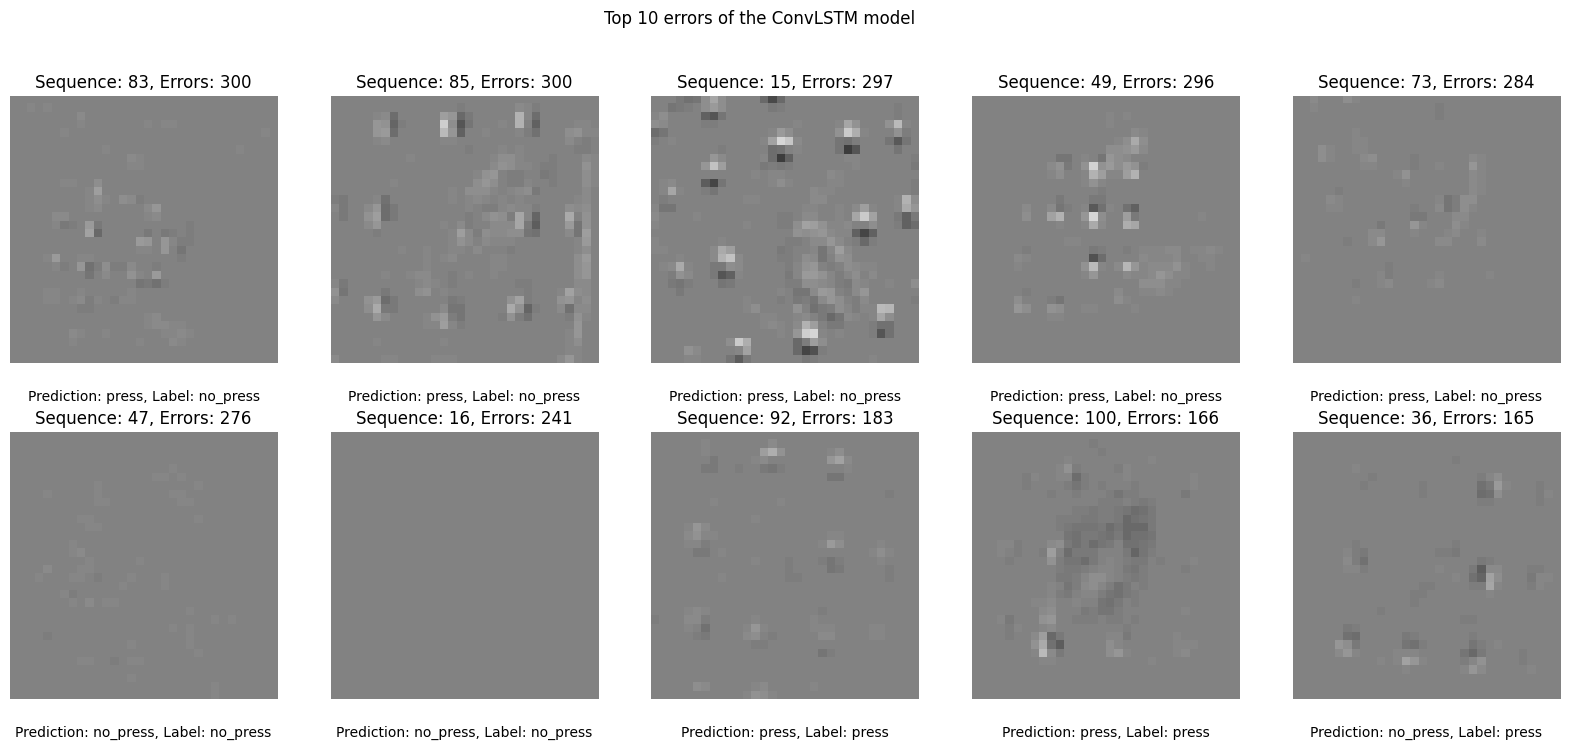

In [10]:
visualize_top_errors(model, test_dataloader, model_name="ConvLSTM", top_n=10, save_path='convlstm_top_errors.mp4')